In [1]:
import pandas as pd
path = 'C:/Users/USER/Desktop/dataset/'
df = pd.read_csv(path+'winequality-red.csv')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Wine Quality : 3 ~ 8 >>> transform to 0 ~ 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

df.loc[:,'quality'] = df.quality.map(quality_mapping)

In [7]:
len(df)

1599

In [12]:
df.sample(frac=1).reset_index(drop=True) # frac=1 1비율 만큼의 return
df_train = df[:1000]
df_test =  df[1000:]

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [31]:
from sklearn import tree
from sklearn import metrics

# 의사결정나무
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=2021)
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
       'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3, random_state=2021)

In [32]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [33]:
print(train_accuracy,test_accuracy) 
# train accuracy : 58% / test accuracy : 53.9%

0.58 0.5392320534223706


In [34]:
clf = tree.DecisionTreeClassifier(max_depth=7,random_state=2021)
clf.fit(df_train[cols],df_train.quality)

train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [35]:
print(train_accuracy,test_accuracy) 
# train accuracy : 79.3% / test accuracy : 51.2%

0.793 0.5125208681135225


#### max_depth에 따른 정확도 계산

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick',labelsize=20)

%matplotlib inline

In [38]:
train_accuracies = [0.5]
test_accuracies = [0.5]

# depth : 1~ 24
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth,random_state=2021)
    cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
       'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
    
    clf.fit(df_train[cols],df_train.quality)
    
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)    

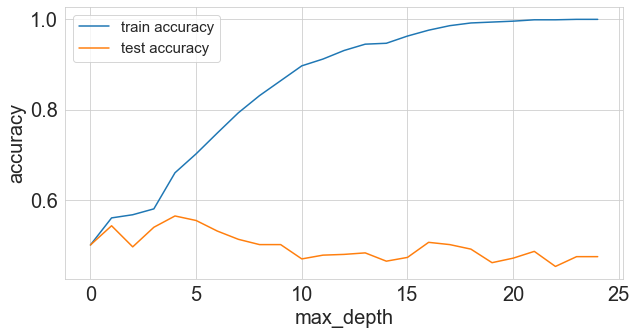

In [43]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend(loc='upper left', prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth',size=20)
plt.ylabel('accuracy',size=20)
plt.show()

Text(0, 0.5, 'count')

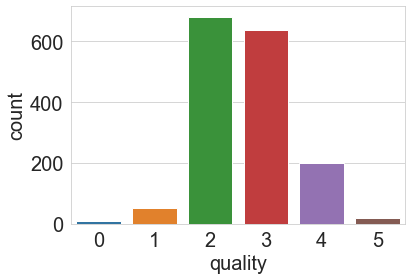

In [49]:
# redwine data quality 변수 분포
b = sns.countplot(x='quality',data = df)
b.set_xlabel('quality',fontsize=20)
b.set_ylabel('count',fontsize=20)